In [2]:
import pandas as pd

In [3]:
mf_val_data = pd.read_csv('BankNiftyMotiLalOswalNAV.csv')

In [4]:
mf_val_data.head()
mf_val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 6 columns):
mf_schcode     93 non-null int64
navdate        93 non-null object
navrs          93 non-null float64
navreprice     93 non-null int64
navsaprice     93 non-null int64
mo_sch_name    93 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 4.5+ KB


In [5]:
mf_val_data_filtered = mf_val_data.drop(['mf_schcode','navreprice','navsaprice', 'mo_sch_name'], axis='columns')
mf_val_data_filtered.head()

,navdate,navrs
0,24-01-2020 00:00:00,11.3954
1,23-01-2020 00:00:00,11.3099
2,22-01-2020 00:00:00,11.2041
3,21-01-2020 00:00:00,11.2911
4,20-01-2020 00:00:00,11.3387


In [6]:
mf_val_data_filtered.describe()

,navrs
count,93.000000
mean,11.156356
std,0.567245
min,9.796800
25%,10.761200
50%,11.341300
75%,11.655000
max,11.852800


In [7]:
nifty_bank_data = pd.read_csv('NiftyBank.csv')
nifty_bank_data.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,1/24/2020,"31,241.75","31,040.10","31,375.45","30,879.05",424.62K,0.77%
1,1/23/2020,"31,004.05","30,742.20","31,087.25","30,621.35",343.82K,0.99%
2,1/22/2020,"30,701.45","31,061.60","31,149.05","30,614.00",200.58K,-0.80%
3,1/21/2020,"30,947.55","30,978.85","31,171.25","30,858.60",227.48K,-0.43%
4,1/20/2020,"31,080.65","31,923.95","31,923.95","31,050.95",282.23K,-1.61%


In [8]:
date_inex = pd.to_datetime(nifty_bank_data.Date)

In [9]:
nifty_bank_data.Date = date_inex
nifty_bank_data.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,2020-01-24,"31,241.75","31,040.10","31,375.45","30,879.05",424.62K,0.77%
1,2020-01-23,"31,004.05","30,742.20","31,087.25","30,621.35",343.82K,0.99%
2,2020-01-22,"30,701.45","31,061.60","31,149.05","30,614.00",200.58K,-0.80%
3,2020-01-21,"30,947.55","30,978.85","31,171.25","30,858.60",227.48K,-0.43%
4,2020-01-20,"31,080.65","31,923.95","31,923.95","31,050.95",282.23K,-1.61%


In [10]:
mf_val_data_filtered.navdate = pd.to_datetime(mf_val_data_filtered.navdate)
mf_val_data_filtered.head()
mf_val_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
navdate    93 non-null datetime64[ns]
navrs      93 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 KB


In [11]:
bank_nifty_mf_data  = pd.concat([nifty_bank_data,mf_val_data_filtered], axis='columns')
bank_nifty_mf_data.head()

,Date,Price,Open,High,Low,Volume,Chg%,navdate,navrs
0,2020-01-24,"31,241.75","31,040.10","31,375.45","30,879.05",424.62K,0.77%,2020-01-24,11.3954
1,2020-01-23,"31,004.05","30,742.20","31,087.25","30,621.35",343.82K,0.99%,2020-01-23,11.3099
2,2020-01-22,"30,701.45","31,061.60","31,149.05","30,614.00",200.58K,-0.80%,2020-01-22,11.2041
3,2020-01-21,"30,947.55","30,978.85","31,171.25","30,858.60",227.48K,-0.43%,2020-01-21,11.2911
4,2020-01-20,"31,080.65","31,923.95","31,923.95","31,050.95",282.23K,-1.61%,2020-01-20,11.3387


In [12]:
bank_nifty_mf_data=bank_nifty_mf_data.drop(['navdate'], axis='columns')

In [13]:

bank_nifty_mf_data.Price = bank_nifty_mf_data.Price.apply(lambda x: x.replace(',',''))
bank_nifty_mf_data.Price.head()
bank_nifty_mf_data.Price = bank_nifty_mf_data.Price.astype(float)

In [14]:
bank_nifty_mf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 8 columns):
Date      94 non-null datetime64[ns]
Price     94 non-null float64
Open      94 non-null object
High      94 non-null object
Low       94 non-null object
Volume    94 non-null object
Chg%      94 non-null object
navrs     93 non-null float64
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 6.0+ KB


In [15]:
toDelete = bank_nifty_mf_data[bank_nifty_mf_data.Date < '2019-09-11'].index

In [16]:
bank_nifty_mf_data=bank_nifty_mf_data.drop(toDelete, axis='rows')

In [17]:
bank_nifty_mf_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 8 columns):
Date      92 non-null datetime64[ns]
Price     92 non-null float64
Open      92 non-null object
High      92 non-null object
Low       92 non-null object
Volume    92 non-null object
Chg%      92 non-null object
navrs     92 non-null float64
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 6.5+ KB


In [18]:
import matplotlib.pyplot as plt
import seaborn as sea


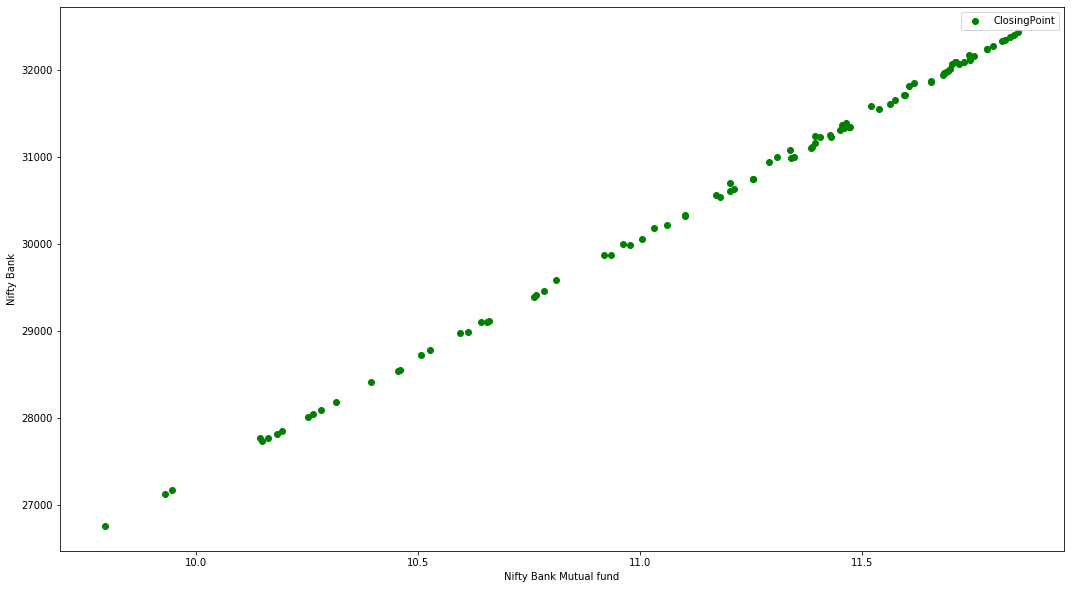

In [19]:
%matplotlib inline
plt.figure(figsize=(18,10))
plt.plot(bank_nifty_mf_data.navrs, bank_nifty_mf_data.Price, 'go', label='ClosingPoint')
plt.xlabel('Nifty Bank Mutual fund')
plt.ylabel('Nifty Bank')
plt.legend(loc='best') 


In [20]:
X=bank_nifty_mf_data.navrs

In [21]:
X.head()

0    11.3954
1    11.3099
2    11.2041
3    11.2911
4    11.3387
Name: navrs, dtype: float64

In [22]:
y = bank_nifty_mf_data.Price
y.head()

0    31241.75
1    31004.05
2    30701.45
3    30947.55
4    31080.65
Name: Price, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
import numpy as np
p = X_train.to_numpy()
p=p[:,np.newaxis]
q = X_test.to_numpy()
q=q[:,np.newaxis]

In [26]:
model = LinearRegression()
model.fit(p, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
model.score(q, y_test)

0.9997098449220048

Vacation

In [28]:
model.predict([[11.40915775062117]])

array([31215.24153778])

Children

In [29]:
model.predict([[11.374403296089511805183381160099]])

array([31118.98319906])

HouseGoal

In [30]:
model.predict([[11.26643773265194]])

array([30819.95431441])

Wealth

In [31]:
model.predict([[11.33067440174039]])

array([30997.86863171])